# Gibbs phenomenon
### Mohammad Mahdi Barghi


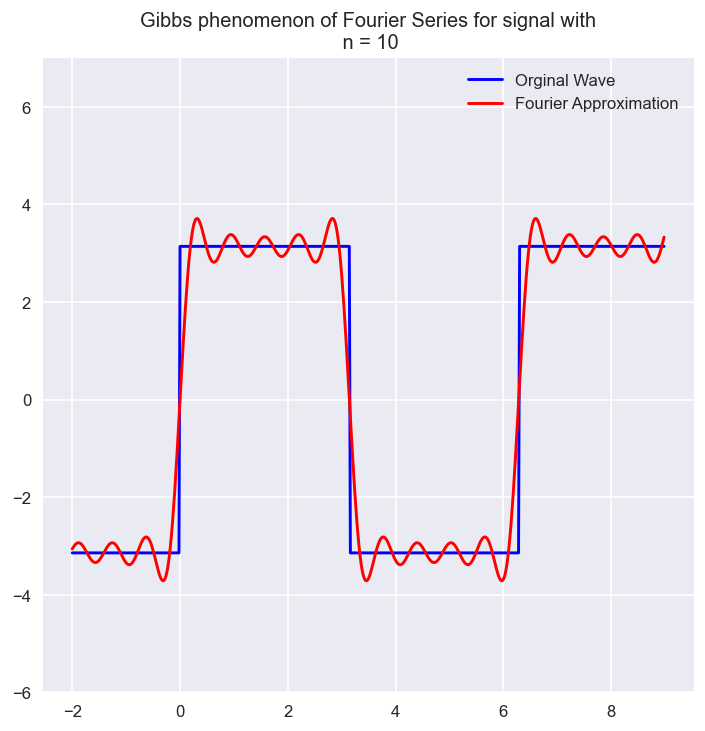

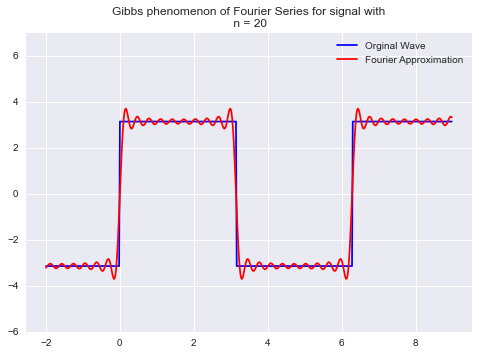

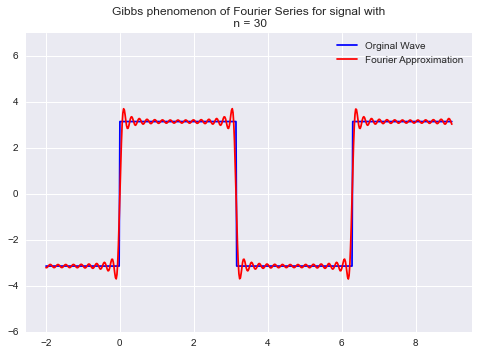

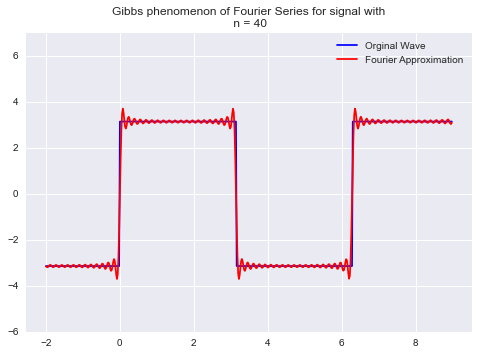

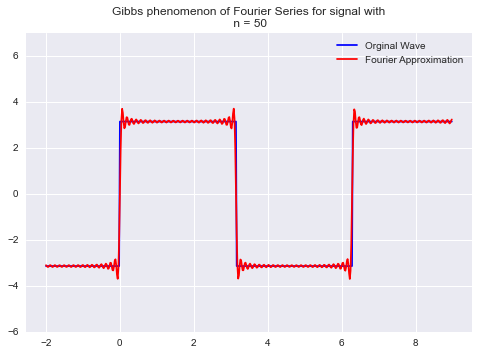

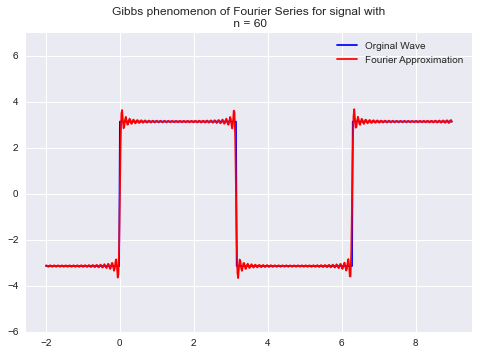

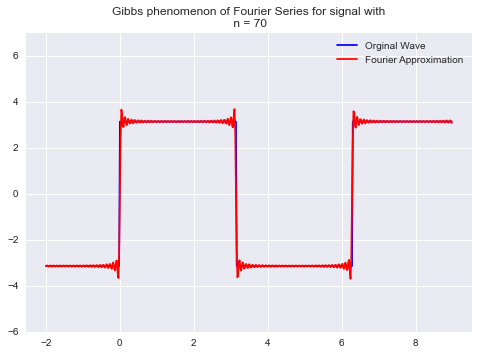

<Figure size 576x396 with 0 Axes>

In [19]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import *
import scipy.integrate as integrate
 
signal = figure(figsize=(7, 7), dpi=120)
 
 
 
def makePeriodic(li,lf,f,x):
    if x>=li and x<=lf :
        return f(x)
    elif x>lf:
        x_new=x-(lf-li)
        return makePeriodic(li,lf,f,x_new)
    elif x<(li):
        x_new=x+(lf-li)
        return makePeriodic(li,lf,f,x_new)
 


def findPeriod(li,lf,x):
    return makePeriodic(li,lf,periodFunction,x)
 

def periodFunction(x):
    if x>0:
        return np.pi
    else:
        return -np.pi
 

def fourierCalculate(li, lf, n, f):
    l = (lf-li)/2
    a0=1/l*integrate.quad(lambda x: f(x), li, lf)[0]
    A = np.zeros((n))
    B = np.zeros((n))
     
    for i in range(1,n+1):
        A[i-1]=1/l*integrate.quad(lambda x: f(x)*np.cos(i*np.pi*x/l), li, lf)[0]
        B[i-1]=1/l*integrate.quad(lambda x: f(x)*np.sin(i*np.pi*x/l), li, lf)[0]
 
    return [a0/2.0, A, B]
 
def fourierSeries(coeffs,x,l,n):
    value = coeffs[0]
    for i in range(1,n+1):
        value = value + coeffs[1][i-1]*np.cos(i*np.pi*x/l) +  coeffs[2][i-1]*np.sin(i*np.pi*x/l)
    return value
     
 
 
 
if __name__ == "__main__":
 
    plt.style.use('seaborn')
     
 
    li = -np.pi
    lf = np.pi
    l = (lf-li)/2.0
 

 # Calculating Signals
    for n in range(10,80,10):

        plt.title('Gibbs phenomenon of Fourier Series for signal with\n n = '+str(n))
        points = fourierCalculate(li,lf,n,periodFunction)
        

        checkPoint = 0.02
        x_l = -2
        x_u = 9

        x = np.arange(x_l,x_u,checkPoint)
        x_plot =[]
        
        y2 = [findPeriod(li,lf,xi) for xi in x]
        y2_fourier = [fourierSeries(points,xi,l,n) for xi in x]
        
        y_plot2 = []
        y_plot2_fourier = []
        plt.ylim(-6,7)


# Draw Signals
        for i in range(x.size):
            x_plot.append(x[i])
            y_plot2.append(y2[i])
            y_plot2_fourier.append(y2_fourier[i])
            
            
        
        plt.plot(x_plot,y_plot2,c='blue',label='Orginal Wave')
        plt.plot(x_plot,y_plot2_fourier,c='red',label='Fourier Approximation')
        plt.legend()
        plt.pause(0.00001)
        



        
        plt.clf()

  